In [ ]:
# 현 코드가 자주 쓰인다고 한다. 참고하자.
df_titanic=pd.read_csv('C:/Users/user/Downloads/titanic/train.csv')
age=df_titanic['Age']
bins = [0, 10, 20, 30, 50, 65,100]
group_names = ['유아','청소년','청년','장년','중년','노년']
df_titanic['Cate_Age']=pd.cut(age, bins, labels=group_names)
df_titanic

In [1]:
# 스크래핑 주제를 가져온다면
# 신문기사등을 일정기간동안 수집하는 것을 연습해보자.
# 영화, 상품, 음악 등의 댓글을 수집하는 오피니언 마이닝도 존재한다.
# https://paperswithcode.com/datasets 이 사이트도 참고하자. 그 유명한 CIFAR -10도 여기서 볼 수 있다.
# https://huggingface.co/datasets/bookcorpus 텍스트 대화등을 볼 수 있다. 트레이닝을 시켜서 챗봇을 만드는 기반이 된다.
# 총 74만 페이지가 존재한다. 8억개의 단어로 구성되어있다. 사전학습을 위한 목적으로 쓰일 수 있다.
# 도서 중 다운로드 가능한 자료들도 존재한다. 
# 커뮤니티, 블로그, 지식인 등 포털에서 제공하는 정보를 활용하는 것도 방법이 된다.
# 시간이 된다면 연습을 해 두자.


In [2]:
import pandas as pd
import numpy as np

In [3]:
# 컷 함수 사용하기
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [4]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [5]:
age_categories.categories
# 총 4개의 카테고리로 나눈다는 의미이다.
# 오른쪽이 폐구간 왼쪽이 개구간이라는 뜻이다.


IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [6]:
age_categories.categories[0]
# 각각의 카테고리에 대해서도 확인이 가능하다.

Interval(18, 25, closed='right')

In [8]:
pd.value_counts(age_categories)
# 상당히 많이 쓰인다. 기억해두자.

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [9]:
# 먼저 영화폴더에서는 콜론기호 두 개를 사용하여 구분한다. 구분을 ::로 해야한다.
# 장르는 |기호로 되어있다. 장르열을 |로 구분해보자.
# 성별자료가 1890년부터 2010년까지 존재한다.
# 이름의 유행, 특정 이름에 대한 트렌드, 유명인 이름, 과거에는 여자아이 이름이었지만 현재는 남자아이 이름인 경우
# 또는 유명인 이름이나 이름의 길이등도 조사가 가능할 것이다.
# 성별에 따른 모음과 자음의 비율이나 순서, 선호도등도 조사 가능하다.
# 이주민 출신을 찾는 것도 가능하다. 특정 국가의 이름은 뒤에 특정 호칭이 붙는다.(Alison같은 케이스)
# 이름의 다양성을 파악 가능하다. 또는 이름패턴을 확인 가능하다.


In [10]:
# 데이터 분석을 하기 위해서는 데이터가 무조건 있어야 한다. 
# 데이터가 없다면 채워넣을 수 있을지라도 데이터 오염이 심해진다.
# 데이터가 있는지를 반드시 확인해야 한다. 
# 무엇을 할 지 명확해야 하고 과정속에서 필요한 데이터가 어디에 있는지. 어떻게 얻을 지를 명확하게 알아야 한다.
# 없으면 수집을 해야 하며 한다면 어떻게 해야하는가를 알아야 한다.
# 반드시 데이터가 있는지를 봐야 한다. 잘못하면 프로젝트가 실패할 가능성이 있다.

In [11]:
pd.read_table('movies.dat')
# 문제가 꽤 많아보인다.

,1::Toy Story (1995)::Animation|Children's|Comedy
0,2::Jumanji (1995)::Adventure|Children's|Fantasy
1,3::Grumpier Old Men (1995)::Comedy|Romance
2,4::Waiting to Exhale (1995)::Comedy|Drama
3,5::Father of the Bride Part II (1995)::Comedy
4,6::Heat (1995)::Action|Crime|Thriller
...,...
3877,3948::Meet the Parents (2000)::Comedy
3878,3949::Requiem for a Dream (2000)::Drama
3879,3950::Tigerland (2000)::Drama
3880,3951::Two Family House (2000)::Drama


In [12]:
pd.read_table('movies.dat',)
# 헤더가 없는 데이터기에 헤더를 없게 설정했다. 그래도 웬지 불편하다.

,0
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy
...,...
3878,3948::Meet the Parents (2000)::Comedy
3879,3949::Requiem for a Dream (2000)::Drama
3880,3950::Tigerland (2000)::Drama
3881,3951::Two Family House (2000)::Drama


In [13]:
pd.read_table('movies.dat', header = None, sep = "::")
# 좀더 다듬어졌다.

C:\Users\user\AppData\Local\Temp\ipykernel_11400\2418003667.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pd.read_table('movies.dat', header = None, sep = "::")


,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [16]:
movies = pd.read_table('movies.dat', header = None, sep = "::", names=["movie_id","title","genres"])
#꽤 갖추어졌다.

C:\Users\user\AppData\Local\Temp\ipykernel_11400\1745983108.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_table('movies.dat', header = None, sep = "::", names=["movie_id","title","genres"])


In [17]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [19]:
# 장르 열을 여러 개로 나눌 수도 있다. 또는 장르를 분리해서 다른 테이블에 배치할 수도 있다.
# 추후에는 장르에 따른 추천 시스템을 만들 것이다. 그래서 장르들을 분류하는 것이 필요할 것이다.
# 모든 장르들을 조사해서 열로 쪼개서 각각의 영화마다 해당되는 장르를 표시할 예정이다.
movies['genres']
# 바 기호를 기준으로 나눠야 한다. 람다를 써도 되지만 str을 써서 더 간단하게 만들어보자. 

0        Animation|Children's|Comedy
1       Adventure|Children's|Fantasy
2                     Comedy|Romance
3                       Comedy|Drama
4                             Comedy
                    ...             
3878                          Comedy
3879                           Drama
3880                           Drama
3881                           Drama
3882                  Drama|Thriller
Name: genres, Length: 3883, dtype: object

In [20]:
movies['genres'].str.split("|")

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genres, Length: 3883, dtype: object

In [22]:
# 장르들에 대해서 숫자를 표시하고 싶다. 먼저 유니크를 추출해야 할 것이다. 
# 근데 그것보다 더 쉬운 방법이 존재한다.
dummies = movies['genres'].str.get_dummies("|")
dummies
# 우리가 원하는 방식의 데이터가 바로 출력되었다.
# 자료들 전체에 대해 더미화하라는 뜻이다.
# 전체 리스트에 담겨있는 리스트에서 유일한 것을 뽑아서 전체 열에서 해당 요소값을 1로 표시한 것이다.

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
dummies.iloc[:10,:6]
# 이렇게 원하는 행과 열만 추출하는 것도 가능하다.

,Action,Adventure,Animation,Children's,Comedy,Crime
0,0,0,1,1,1,0
1,0,1,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,0,0,0,0,1
6,0,0,0,0,1,0
7,0,1,0,1,0,0
8,1,0,0,0,0,0
9,1,1,0,0,0,0


In [25]:
movies.join(dummies)
# 좌우로 합쳐졌다. 

,movie_id,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
movies_windec = movies.join(dummies.add_prefix("Genre_"))
movies_windec
# 접두어 옵션이다. 열 이름이 보기 편해졌다. 

,movie_id,title,genres,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
movies_windec.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [29]:
# 추천 알고리즘은 이와 같이 이루어진다. 여기에 추가로 나이, 직업, 줄거리, 평점등을 종합해서 영화추천을 한다.
# 이것이 KNN이다 머신러닝 알고리즘이다. 

In [43]:
s = pd.Series([1, 2, 3, None])
s
s.dtype
# 결측값은 플롯으로 들어가게 된 원인이다. 

dtype('float64')

In [44]:
s.isna()
s[3] is pd.NA

False

In [45]:
s =s.astype('Int64')#맨 앞 대문자 유의
s

0       1
1       2
2       3
3    <NA>
dtype: Int64

In [46]:
s[3] is pd.NA#결측값이 Float일 때는 False였는데 int가 된 상태에서 True로 나온다. 
#넘파이는 둘다 False로 나온다. 

True

In [47]:
df = pd.DataFrame({"A": [1, 2, None, 4],
                   "B": ["one", "two", "three", None],
                   "C": [False, None, False, True]})
df

,A,B,C
0,1.0,one,False
1,2.0,two,None
2,NaN,three,False
3,4.0,None,True


In [49]:
df.info()
# nan 과 none은 결측값으로 간주한다.
# 타입은 원래 인트였던 녀석도 nan이 있으니 float가 되었고 문자는 그냥 문자. bool타입은 문자로 바뀌었다.
# 작업하다가 정수를 입력했는데도 float가 된다는 것은 결측값이 있다는 뜻이다. 불린도 마찬가지이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       3 non-null      object 
 2   C       3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


In [52]:
df['A'] = df['A'].astype('Int64')
df

,A,B,C
0,1,one,False
1,2,two,None
2,<NA>,three,False
3,4,None,True


In [53]:
df.info()
# 강제로 바꾼 결과. nan위치는 <NA>로 출력되었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       3 non-null      Int64 
 1   B       3 non-null      object
 2   C       3 non-null      object
dtypes: Int64(1), object(2)
memory usage: 232.0+ bytes


In [54]:
df['C'] = df['C'].astype('boolean')
df

,A,B,C
0,1,one,False
1,2,two,<NA>
2,<NA>,three,False
3,4,None,True


In [55]:
df.info()
# 불린쪽 위치도 강제로 바꾸었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      Int64  
 1   B       3 non-null      object 
 2   C       3 non-null      boolean
dtypes: Int64(1), boolean(1), object(1)
memory usage: 208.0+ bytes


In [61]:
import re
text = "foo    bar\t baz  \tqux"

In [64]:
re.findall('\w+',text)

['foo', 'bar', 'baz', 'qux']

In [65]:
re.split('\s+',text)
# 공백문자를 기반으로 분리하라는 의미이다. 정규표현식으로 가능한 split이다.

['foo', 'bar', 'baz', 'qux']

In [66]:
values = pd.Series(['apple', 'orange', 'apple',
                    'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [67]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [68]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

In [74]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
rng = np.random.default_rng(seed=12345) # 랜덤이지만 정해진 시드
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),# 레인지 함수
                   'count': rng.integers(3, 15, size=N), # 3부터 15까지의 랜덤
                   'weight': rng.uniform(0, 4, size=N)}, # 0부터 4까지의 균등분포 랜덤
                  columns=['basket_id', 'fruit', 'count', 'weight'])
df
# 유니폼은 균등분포. 기억하자.

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [75]:
# 사실 데이터를 보자마자 하는 것은 정해져있다.
df.shape

(8, 4)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   basket_id  8 non-null      int32  
 1   fruit      8 non-null      object 
 2   count      8 non-null      int64  
 3   weight     8 non-null      float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 356.0+ bytes


In [77]:
# 데이터프레임에 대한 속성을 먼저 확인하는 작업을 한다. 데이터 크기와 결측값의 갯수인 것이다.
# 밑의 메모리 사용량도 나중에 필요할 것이다.
df.describe()

,basket_id,count,weight
count,8.00000,8.000000,8.000000
mean,3.50000,9.000000,2.160326
std,2.44949,3.116775,1.194908
min,0.00000,5.000000,0.746937
25%,1.75000,5.750000,1.246687
50%,3.50000,10.500000,1.978837
75%,5.25000,11.250000,2.960071
max,7.00000,12.000000,3.795525


In [79]:
# 데이터 통계속성이다. 숫자로 이루어진 요소에 대해 평균, 표준편차등을 볼 수 있다.
# 여기서 평균이 2.1인데 중위수가 1.9라는 뜻은 데이터의 변동성이 크다는 의미로 받아들일 수 있다.
df.isnull().sum()

basket_id    0
fruit        0
count        0
weight       0
dtype: int64

In [80]:
# 열 단위의 결측값 정리이다. 사실 info에서도 확인 가능하지만 더 간단하게 볼 수 있는 방법이다. 
df.columns

Index(['basket_id', 'fruit', 'count', 'weight'], dtype='object')

In [81]:
# 열의 이름을 확인할 때 사용한다. 

In [82]:
# object는 문자타입니다. 다만 종류를 나타내는 카테고리로 바꾸고 싶다고 하자.
# 그에 대한 과정을 알아보자.
# 변수는 두 가지 종류가 있다.
# 1. 연속형 변수. 나이처럼 순서가 있는 변수이다.
# 2. 범주형 변수(이산변수). 성별, 종족처럼 순서가 없는 변수이다.

# 척도(scale)는 변수값을 표현하는 수준이다. 척도에는 여러 종류가 존재한다.
# 명명척도 ) 변수값이 같다. 다르다 라고 말할 수 있다. 데이터값이 종류를 나타낸다. 데이터사이에 순서가 없다. 
# 예시 : 혈액형, 성별, 종족
# 서열척도 ) 종류로 나타낼 수 있지만 데이터사이에 순서가 존재한다. 종류간에 간격이 동일하지 않다.
# 예시 : 계급, 학점 등
# 등간척도 ) 수치자료형으로 간격이 일정하고 수치형태의 자료들이다. 
# 예시 : 온도, 습도 등
# 비율척도 ) 등간척도와 비슷하지만 절대영점(영점의 의미가 아무것도 존재하지 않는 상태)이 추가가 된다. 
# 예시 : 길이
# 길이가 5배면 실제로 5배의 스케일을 가진다. 하지만 온도가 10도에서 20도가 된다해서 2배의 스케일을 가지는 것은 아니다.

# 척도가 나오는 이유는 척도에 따라 데이터를 분석하는 방법이 달라지기 때문이다.
# 척도에 따른 연산방법은 다르다.
# 예를 들어 남자1, 여자2로 가정할 경우 수치로 만들경우 사칙연산이 가능해진다. 
# 정말 그렇다면 남자+남자 = 여자라는 괴랄한 상황이 발생한다.
# 어제 숙제로 낸 나이대는 서열척도이다. 청년, 중년은 간격이 일정하지 않다. 나이는 비율척도이다. 


In [85]:
blood = ['A', 'A', 'A', 'B', 'B', 'AB', 'O']
# 이 데이터는 명명척도이다. 그래프로 시각화를 해보려고 한다. 
np.unique(blood, return_counts=True)
# 데이터의 건수도 한꺼번에 출력해보자.

(array(['A', 'AB', 'B', 'O'], dtype='<U2'), array([3, 1, 2, 1], dtype=int64))

In [86]:
import seaborn as sns

In [89]:
pd.Series(blood).value_counts()

A     3
B     2
AB    1
O     1
dtype: int64

<Axes: ylabel='count'>

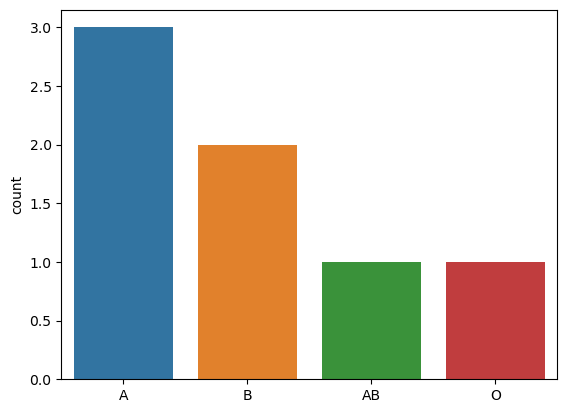

In [91]:
sns.countplot(x = blood)
# 특성을 주면 해당 데이터의 건수를 시각적으로 나타내어준다.

In [92]:
x = [1, 1, 1, 2, 3, 5, 5, 7, 8, 9]

In [93]:
np.histogram(x,4) # x변수에 담긴 데이터를 4개로 균등하게 나누라는 의미이다.
# 1~3까지 4건, 3~5까지 1건, 5~7까지 2건, 7~9까지 3건으로 표시되고 2개의 요소가 튜플 안에 위치한다.
# 즉 리턴을  받을 수 있다는 뜻이다.

(array([4, 1, 2, 3], dtype=int64), array([1., 3., 5., 7., 9.]))

In [94]:
hist, edge = np.histogram(x,4)
print(hist)
print(edge)
#두 개의 배열이 나왔다. 

[4 1 2 3]
[1. 3. 5. 7. 9.]


C:\Users\user\AppData\Local\Temp\ipykernel_11400\2028825467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,bins=4)


<Axes: ylabel='Density'>

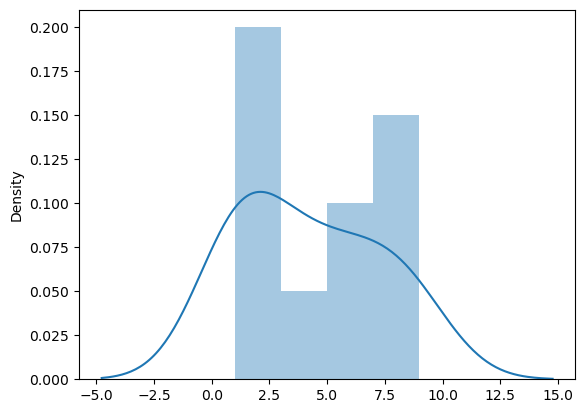

In [95]:
sns.distplot(x,bins=4)
# x구간에 저장된 데이터를 4개의 구간을 나누어 출력을 한 것이다. 
# x축의 의미는 수치데이터이다. 1부터 9까지의 범위가 나온다.
# Y축은 밀도(Density)이다. 빈도수가 아니다. 

C:\Users\user\AppData\Local\Temp\ipykernel_11400\2994684449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,bins=4, kde =False)


<Axes: >

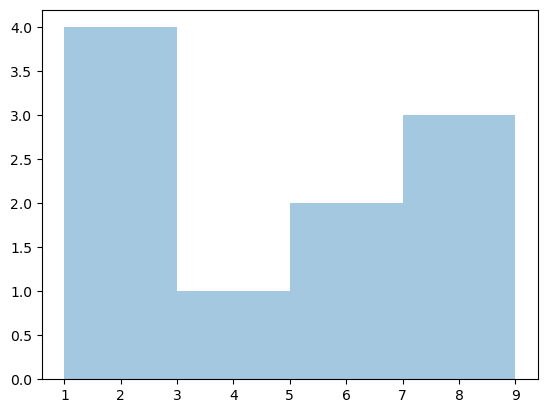

In [96]:
sns.distplot(x,bins=4, kde =False)
# 밀도를 표시하지 않으면 빈도수로 바뀌게 되었다. 

In [97]:
np.mean(x)
# x의 평균이다. 
# 평균은 극단적인 값(outliers)에 의해 영향을 크게 받는다. 연봉의 평균이 대표성을 띄지 못하는 이유기도 하다.

4.2

In [98]:
np.median(x)
# 중위수이다. 데이터가 홀수일 경우 문제가 없는데 짝수인 경우 중앙을 표현할 수 없기에 중앙의 두 데이터의 평균을 내버린다.
# 그래서 데이터가 짝수인 경우 없던 데이터가 갑자기 튀어나올 수 있는 점을 참고하자.

4.0

In [99]:
# 최빈수는 현재의 넘파이에 따로 없다. 
from scipy.stats import mode

In [100]:
mode(x)
# 최빈수를 말한다. 3개의 최빈수가 존재한다는 뜻이다.

C:\Users\user\AppData\Local\Temp\ipykernel_11400\1889230883.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(x)


ModeResult(mode=array([1]), count=array([3]))

In [104]:
# 데이터가 퍼져있는 척도. 분산과 표준편차들이 존재한다. 자료가 흩어져있는 정도를 표현하는 척도이다.
print(np.max(x))
print(np.min(x))
print(np.max(x)-np.min(x)) #최댓값에 최솟값을 뺀 숫자가 범위이다.

9
1
8


In [105]:
# 각 데이터 - 평균 = 편차
# 편차가 크다는 뜻은 평균으로부터 멀리 떨어져 있다는 뜻이다. 
# 모든 데이터 - 평균 = 모든 데이터의 편차이다. 양수, 음수가 다양하게 나올 것이다. 여기에 제곱을 한다.
# ((모든 데이터 - 평균)제곱)평균 = 분산
# 분산이 크다는 소리는 각각의 데이터 평균에서 크게 벗어났다는 의미이다. 

In [106]:
# 넘파이에서 분산을 구하는 방법은 var을 쓴다.
np.var(x)
# 분산은 제곱이 들어간다. 표준편차는 이것에 대한 제곱근을 취한다는 소리이다. 즉 여기에 루트를 씌워버린다.

8.36

In [108]:
np.std(x)
# 표준편차이다. np.sqrt(np.var(x))와 같다. 분산에 대한 양의 제곱근이다.

2.891366458960192

In [109]:
np.quantile(x, .25) # 1사분위수를 나타낸다. 


1.25

In [110]:
np.quantile(x, .75) # 3사분위수를 나타낸다.

6.5

In [111]:
iqr = 5.25
# inter quarter range의 약자이다. 3사분위수에서 1사분위수를 뺀 값을 말한다.
# 일반적으로 iqr*1.5를 한 값을 벗어나면 특이케이스로 본다. 
# Q1(1사분위수), median(중위수), Q3(3사분위수)로 나누어진다. 
# Q1 - iqr*1.5 = 최소범위 , Q3 + iqr*1.5 = 최대범위
# 위를 박스플랏이라고 하고 박스플랏 바깥에 있는 값을 이상치, 극단치(outliers)라고 한다.

In [112]:
# 공분산은 두 개의 변수가 함께 변하는 정도를 나타내는 지표이다. 
# 하나의 값이 변할 때 다른 값의 변화를 확인하여 두 변수 사이의 관계를 이해할 수 있다. 
# 공분산값은 단위가 중요하다. 센티미터로 기준할 때와 미터로 기준할 때는 결과가 매우 다르다. 
# 공분산을 표준화시킨 것을 상관계수라고 한다. 
# 예전에 봤던 부모키, 자식키를 기준으로 하면 공분산 / 부모키표준편차*자녀키표준편차 라고 한다.
# 대체로 1이나 -1에 가까울수록 강한 연관성을 가지고 있다고 한다. 0에 근접하면 관계가 없어진다 하는 것이 일반적이다. 

In [113]:
import matplotlib.pyplot as plt
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]
#예를 들어 부모키와 자식키의 상관관계가 있는지 확인해보자. 위를 예로 들어보자.


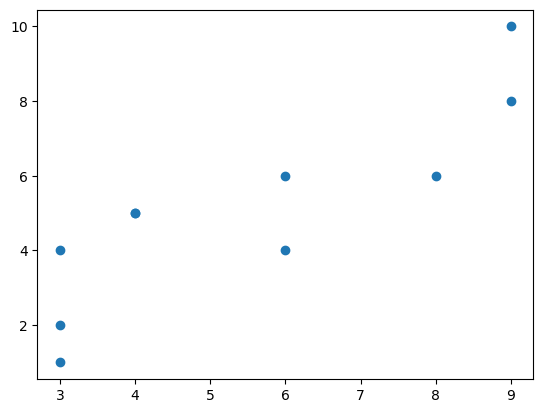

In [114]:
plt.plot(x,y,'o')
# 선형관계가 있어보인다. 직선에 데이터가 분포되어있어 보인다. 선에 가까울수록 강한 상관관계가 있다고 보는 것이다.
# 직선의 기울기는 양수이다. 이를 양의 상관관계가 있다고 한다. 만약 기울기가 음수면 음의 상관관계가 있다고 본다.
# 직선에서 

In [115]:
np.cov(x,y)
# 이미 넘파이에는 공분산을 보는 것이 존재한다.
# 여기서 4개가 나오는데 

array([[6.05555556, 5.61111111],
       [5.61111111, 6.98888889]])

In [116]:
np.cov(x,y)[0,1]
# 이게 공분산이다.

5.61111111111111

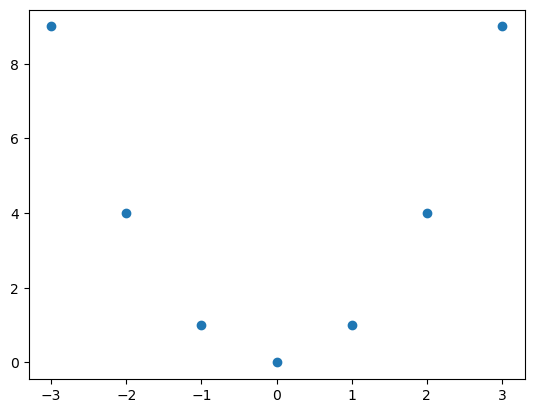

In [117]:
# 주의사항
# 공분산은 선형관계를 알기 위해 사용한다. 두 변수사이간의 관계를 직선형태로 나타낼 수 있는지 보는 것이다.
# 비선형관계일 경우에는 공분산 사용이 의미없는 경우가 많다.
# 비선형관계는 x값의 변화와 y값의 변화가 직선이 아닌 곡선(2차방정식 또는 삼각함수형 파동 곡선)인 경우를 말한다. 
x = [-3,-2,-1,0,1,2,3]
y = np.array(x)**2
plt.plot(x,y,'o')

In [118]:
np.cov(x,y)[0,1]
# 비선형의 공분산은 의미가 없다. 

0.0

In [119]:
# 상관계수도 종류가 여러개가 존재한다.
# 일반적으로 피어슨 상관계수를 말한다. 디폴트 값은 피어슨 상관계수이다.
# pandas.pydata.org
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html#pandas.DataFrame.corrwith
# 피어슨 상관계수 : 상관계수의 대표주자. -1 ~ +1사이값으로 두 변수간의 선형상관관계를 표현한다.
# 스피어만 상관계수 : 데이터에 서열척도가 사용된 변수가 있을 경우에 사용한다. 또는 두 변수 관계가 비선형일때 사용한다.
# 켄달 상관계수 : 두 변수간의 순위를 비교해서 상관계수를 구할때 사용한다. 
# 예를들면 다음과 같다.
#      a b c d e
# 나이 1 3 4 2 5
#  키  1 3 4 2 5
# 이와 같은 경우에 정확히 양의 상관계수가 나오게 된다. 

In [120]:
np.corrcoef(x,y)
# 이것이 상관계수이다. 상당히 많이 쓴다. 현재는 피어슨 상관계수로 정의되었다.

array([[1., 0.],
       [0., 1.]])

In [121]:
np.corrcoef(x,y)[0,1]
# 상관계수는 0인 상태이다. 

0.0

In [122]:
(np.cov(x,y)[0,1])/((np.std(x, ddof=1)*np.std(y, ddof=1)))
# 공분산을 x와y의 표준편차의 곱으로 나눈 값이 상관계수이다.

0.0

In [123]:
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

In [126]:
print(np.cov(x,y)[0,1]) # 공분산
print(np.corrcoef(x,y)) 
print(np.corrcoef(x,y)[0,1]) # 상관계수
# 0.86으로 강한 양의 상관계수를 보인다.

5.61111111111111
[[1.         0.86251728]
 [0.86251728 1.        ]]
0.8625172792135779


In [127]:
# 참고로 corrwith는 데이터프레임에 사용하는 용도이다.
# corrcoef는 리스트에 사용하는 용도이다. 
df = {'x':x,'y':y}
df

{'x': [8, 3, 6, 6, 9, 4, 3, 9, 3, 4], 'y': [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]}

In [128]:
df = pd.DataFrame(df)
df
# 데이터프레임으로 만들어서 사용해보자.

,x,y
0,8,6
1,3,2
2,6,4
3,6,6
4,9,10
5,4,5
6,3,1
7,9,8
8,3,4
9,4,5


In [129]:
df.corr()
# 상관계수가 나온다. 왼쪽 상단과 우측 하단을 읽으면 된다. 
# x와 x의 상관계수(1), y와 y의 상관계수(1), x와 y 또는 y와 x의 상관관계(0.86)
# 즉 이렇게 읽는 것이다. 

,x,y
x,1.000000,0.862517
y,0.862517,1.000000


In [130]:
df.corr(method = 'kendall')
# 켄달은 두 순위간 상관관계이다. 순위가 일치하면 1이 나오고 정 반대면 -1이 나온다.

,x,y
x,1.000000,0.815374
y,0.815374,1.000000


In [131]:
# 타깃변수가 있을 때 어떤 변수가 영향을 주는가를 알고자 할 때 상관계수를 사용하자.
# 또는 상관계수를 구하는 것은 넘파이에도 있지만 판다스에도 있다는 것을 참고하자.
# 사이파이에 통계관련된 함수모듈이 있다.
import scipy.stats as ss

In [133]:
ss.spearmanr(x,y).correlation
# 켄달, 스피어만, 피어슨 모두 가능하다.

0.9000703207408192

In [135]:
df3 = pd.read_csv("titanic/train.csv")
df3
# 여기에 나이열과 생존칸 간에 상관계수를 출력해보자. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [141]:
df3[{"Survived":x,"Age":y}].corr()
# 사실 비선형관계에 있다. 

C:\Users\user\AppData\Local\Temp\ipykernel_11400\2061190367.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  df3[{"Survived":x,"Age":y}].corr()


,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


In [146]:
df_corr = df3.corr()
df_corr
# 사실 이렇게 해서 한꺼번에 추출하는 것도 가능하다.
# 일괄적으로 피어슨을 사용했다. 여기서 결과를 해석할 때 대각선 요소의 위나 아래만 살펴보면 된다.
# 값은 절대값으로 보면 된다. 
# 상관분석은 데이터분석의 필수 과정이다. 

C:\Users\user\AppData\Local\Temp\ipykernel_11400\1836298891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df3.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

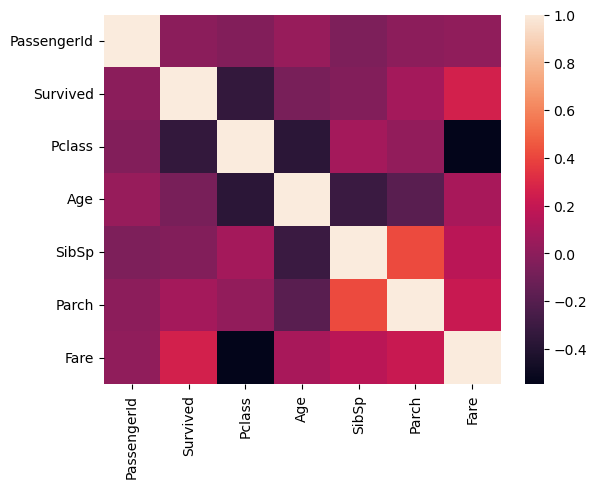

In [147]:
sns.heatmap(df_corr)
# 바의 값이 상관계수이다. 엄청 밝아지거나 엄청 어두워질 경우 상관계수가 커지는 구조이다. 
# 이렇게 보는 것은 조금 어렵다. 보기 쉽게 해보자. 

<Axes: >

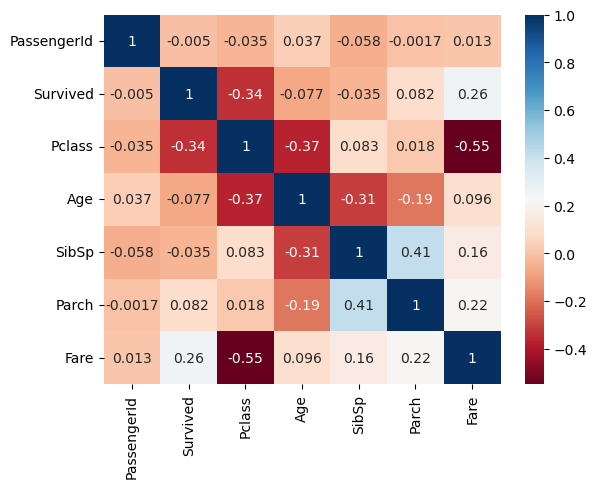

In [149]:
sns.heatmap(df_corr,cmap="RdBu", annot=True)
# 상관계수를 보기 편하게 바꿔보았다. 

In [150]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
rng = np.random.default_rng(seed=12345)
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': rng.integers(3, 15, size=N),
                   'weight': rng.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   basket_id  8 non-null      int32  
 1   fruit      8 non-null      object 
 2   count      8 non-null      int64  
 3   weight     8 non-null      float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 356.0+ bytes


In [152]:
fruit_cat = df['fruit'].astype('category')
fruit_cat
# 타입을 바꿨는데도 외부값이 카테고리지만 내부값은 object이다. 일시적으로 저장하는 것이고 영구적이지 않다. 
# 파이썬에서는 문자열이 아니라 카테고리로 인식하게 된다. 

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [154]:
c = fruit_cat.array
type(c)

pandas.core.arrays.categorical.Categorical

In [155]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [156]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [157]:
data = pd.Series(np.random.uniform(size=9),
                 index=[["a", "a", "a", "b", "b", "c", "c", "d", "d"],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data
# 균등분포로 나누었을 때 구간별로 분포가 유사한 난수 9개가 생성된 상태이다. 
# 인덱스가 멀티인덱스이다. 두겹으로 만들어졌다. 왼쪽의 상위인덱스와 오른쪽의 하위인덱스로 구분된다. 다중구조도 가능하다.


a  1    0.531301
   2    0.022345
   3    0.219659
b  1    0.127245
   3    0.883899
c  1    0.433766
   2    0.676674
d  2    0.597462
   3    0.755158
dtype: float64

In [158]:
data.index
# 멀티인덱스로 출력이 된다.

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [160]:
data.loc['b']

1    0.127245
3    0.883899
dtype: float64

In [162]:
data.iloc[3:5] 

b  1    0.127245
   3    0.883899
dtype: float64

In [163]:
data.loc['b':'d']

b  1    0.127245
   3    0.883899
c  1    0.433766
   2    0.676674
d  2    0.597462
   3    0.755158
dtype: float64

In [165]:
data.loc[:,2]
# 콜론은 전체이다. 그 중 2번 인덱스에 해당하는 자료만 출력했다.

a    0.022345
c    0.676674
d    0.597462
dtype: float64

In [166]:
data.unstack() 
# 데이터가 멀티인덱스였는데 데이터의 멀티인덱스 중에서도 하이레벨에 해당되는 인덱스가 열이고 로우레벨이 행에 오게 되었다.
# 안쪽에 있는 인덱스가 열 인덱스, 바깥의 인덱스가 행 인덱스가 되었다. 1차원구조가 2차원구조로 바로 바뀌었다.
# stack은 쌓는다는 뜻이다. unstack은 쌓은 것을 풀어낸다는 뜻이다. 

,1,2,3
a,0.531301,0.022345,0.219659
b,0.127245,NaN,0.883899
c,0.433766,0.676674,NaN
d,NaN,0.597462,0.755158


In [167]:
data.unstack().stack()
# 풀어내고 다시 쌓은 모습이다. 기존의 값이 똑같다.

a  1    0.531301
   2    0.022345
   3    0.219659
b  1    0.127245
   3    0.883899
c  1    0.433766
   2    0.676674
d  2    0.597462
   3    0.755158
dtype: float64

In [168]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[["a", "a", "b", "b"], [1, 2, 1, 2]],
                     columns=[["Ohio", "Ohio", "Colorado"],
                              ["Green", "Red", "Green"]])
frame
# 먼저 나온 상위레벨을 기준으로 하위레벨도 정렬을 하게 된다. 
# 흔하지는 않는 경우이다.

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [170]:
frame.index.names = ["key1", "key2"]
frame 
# 행 인덱스에 이름을 부여했다.


Ohio     Colorado
          Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [171]:
frame.columns.names = ["state", "color"]
frame
# 열 인덱스도 이름을 부여하는 것이 가능하다.

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [175]:
print(frame.index.nlevels )
print(frame.columns.nlevels )
# 인덱스의 레벨은 몇 개로 구성되어 있는가? 
# 열인덱스의 레벨은 몇 개로 구성되어 있는가?

2
2


In [176]:
frame['Ohio']
# 상위 컬럼과 하위컬럼이 전부 나왔다. 

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [177]:
frame['Colorado']
# 하위컬럼이 초록만 있었고 초록만 출력되었다. 

color      Green
key1 key2       
a    1         2
     2         5
b    1         8
     2        11

In [178]:
frame.swaplevel("key1","key2")
# key위치를 변경함으로서 상위레벨과 하위레벨이 바뀌었다.

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [179]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [180]:
frame.groupby(level="key2").sum()
# 같은것끼리 묶는다. 1끼리 묶였고 2끼리 묶였다. 0+6, 1+7이 반영된다. 서로 더해졌다.


state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [182]:
# 열에 대해서도 그룹화할 수 있다. 
frame.groupby(level="color",axis ='columns').sum()
# 열을 기준으로 그룹화가 이루어졌다. axis로 열을 선택했다. 

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [183]:
frame = pd.DataFrame({"a": range(7), "b": range(7, 0, -1),
                      "c": ["one", "one", "one", "two", "two",
                            "two", "two"],
                      "d": [0, 1, 2, 0, 1, 2, 3]})
frame
# 이번건 많이 쓰는 표현이다. 

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [184]:
frame.set_index("c")
# 이런 작업을 하는 경우가 종종 발생한다.


,a,b,d
c,,,
one,0,7,0
one,1,6,1
one,2,5,2
two,3,4,0
two,4,3,1
two,5,2,2
two,6,1,3


In [185]:
frame.set_index(["c","d"])
# 먼저 기술된게 상위레벨이 되었고 나중에 기술된 것이 하위레벨로 왔다. 나머지 a,b는 열 인덱스가 되었다.
# 인덱스는 데이터가 아니다. 혼동하지 않도록 주의하자. 

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [186]:
frame.set_index(["c","d"],drop=False) 
# cd열이 존재한 채로 나왔다. drop은 디폴트가 True인 것이다. 데이터를 그대로 놔두고 싶을때 쓴다. 

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [187]:
frame2 = frame.set_index(["c","d"])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [188]:
frame2.reset_index()
# 행인덱스가 열이 되어버리고 데이터화 되어버렸다. 
# 기존의 행 인덱스는 0번부터 일련번호를 가지게 하고 행 인덱스들은 열 인덱스로 재배치되었다. 

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [189]:
frame2.reset_index(drop=True)
# 기존의 행 인덱스를 전부 날려버렸다.
# 간간히 쓰이는 함수이다.

,a,b
0,0,7
1,1,6
2,2,5
3,3,4
4,4,3
5,5,2
6,6,1


In [196]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a", "b", "d"],
                    "data2": pd.Series(range(3), dtype="Int64")})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [191]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [192]:
# 데이터는 하나만 분석하는 경우는 거의 없고 두 개 이상을 합친 이후 데이터 분석을 하는 경우가 대부분이다. 
# key열은 이름이 같다. 이 두개를 합치고 싶다. 함수로는 merge, concat, join이 있다.
# 먼저 merge부터 해보자. 
pd.merge(df1,df2)
# 데이터열이 전부 합쳐졌다. 문제는 c와 d가 증발해버렸다. a는 0으로 b는 1로 merge되었다. 
# 이름이 같은 열을 기준으로 합치는 작업을 진행한 것이다. 

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [195]:
# 만약 열 이름이 같은 것이 없으면 이렇게 된다. 그리고 친절하게 오류칸에 해결방안도 제시해준다.
pd.merge(df1,df2)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [197]:
pd.merge(df1,df2, on = 'key')
# 동일한 열 이름이 디폴트다. 

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [199]:
df3 = pd.DataFrame({"lkey": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})
df4 = pd.DataFrame({"rkey": ["a", "b", "d"],
                    "data2": pd.Series(range(3), dtype="Int64")})
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [200]:
df4
# 열 이름이 아예 다르기에 merge는 안될것이다.
# 열 이름이 다른 경우인데 열의 성격은 같다. 이 둘을 합치고 싶다고 하자.

,rkey,data2
0,a,0
1,b,1
2,d,2


In [202]:
pd.merge(df3,df4, left_on= 'lkey',right_on= 'rkey')
# 공통된 값으로 merge를 하는데 성공했다. 즉 키를 일일이 설정해서 묶은 것이다.

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [203]:
pd.merge(df3,df4, left_on= 'lkey',right_on= 'rkey', how ='outer')
# 기존에 존재하지 않던 c,d가 나타났다. 
# 문자데이터에는 NAN이 들어갔고 숫자데이터에는<na>가 들어갔다. 
# 또한 서로간에 존재하지 않던 값도 

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0
6,c,3,NaN,<NA>
7,NaN,<NA>,d,2


In [204]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [205]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [206]:
pd.merge(df1,df2, how = "outer")
# 아까것도 C,D값이 출력이 안되던 것을 출력하게 할 수 있다.

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0
6,c,3,<NA>
7,d,<NA>,2


In [207]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                    "data1": pd.Series(range(6), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a", "b", "a", "b", "d"],
                    "data2": pd.Series(range(5), dtype="Int64")})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [208]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [209]:
pd.merge(df1,df2) 
# key가 존재하는 것 끼리 merge 된 것을 볼 수 있다. 

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [210]:
pd.merge(df1,df2, how = 'left')
# 먼저 나온 것이 left이다. 나중에 나온것이 right이다. 
# 왼쪽에 있는게 다 나왔다. 

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,c,3,<NA>
7,a,4,0
8,a,4,2
9,b,5,1


In [211]:
pd.merge(df1,df2, how = 'right')
# 오른쪽에 있는게 다 나왔다. 
# 기준으로 삼는 것에 따라 출력되는 값이 다르다는 것이다.

,key,data1,data2
0,a,2,0
1,a,4,0
2,b,0,1
3,b,1,1
4,b,5,1
5,a,2,2
6,a,4,2
7,b,0,3
8,b,1,3
9,b,5,3


In [212]:
pd.merge(df1,df2, how = 'inner')
#아웃터는 키가 없는 것도 나왔지만 이너는 디폴트로 나왔다. 즉 inner는 디폴드값이다. 

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [ ]:
# 오늘 했던 것을 연습하는 것을 주로 하고 문제는 간단하게 제출할 것이다.
연속된 세 개의 정수를 더해 12가 되는 경우는 3, 4, 5입니다. 두 정수 num과 total이 주어집니다. 
연속된 수 num개를 더한 값이 total이 될 때, 정수 배열을 오름차순으로 담아 return하도록 solution함수를 완성해보세요.

제한사항
1 ≤ num ≤ 10
0 ≤ total ≤ 100
num개의 연속된 수를 더하여 total이 될 수 없는 테스트 케이스는 없습니다.
입출력 예
num	total	result
3	12	[3, 4, 5]
5	15	[1, 2, 3, 4, 5]
4	14	[2, 3, 4, 5]
5	5	[-1, 0, 1, 2, 3]

In [217]:
def solution(num , total):
    ans_list = []
    if num == 1: 
        ans_list.append(total)
    else:
        ans.append(num)
    return ans_list
solution(1, 10)
        
# 1단계


        
    
    

[10]

In [282]:
def solution(num , total):
    ans_list = []
    if num == 1: 
        ans_list.append(total)
    elif num >=2 and num <=10:
        middle = total/num
        if num%2 == 0:
            nums1 = list(range(int(middle) - int(num / 2) +1 , int(num / 2) + int(middle) + 1))
            print(nums1)
            
        elif num%2 != 0:
            nums1 = list(range(int(middle) - int(num / 2) , int(num / 2) + int(middle) + 1))     
            print(nums1)
                
        
        ans_list.append(nums1)
    return ans_list
solution(7, 28)

[1, 2, 3, 4, 5, 6, 7]


[[1, 2, 3, 4, 5, 6, 7]]

In [ ]:
def solution(num , total):
    ans_list = []
    if num == 1: 
        ans_list.append(total)
    elif num >=2 and num <=10:
        middle = total/num
        if 4.5 == int(4):
            (int(num/2)-1):(int(num/2)+1)


        elif middle != int(middle):
            
            
                
        
        ans_list.append(middle)
    return ans_list
solution(2, 9)

In [242]:
def solution(num, total):
    ans_list = []
    if num == 1:
        ans_list.append(total)
    elif 2 <= num <= 10:
        middle = total / num
        if middle == int(middle):
            nums1 = list(range(int(middle) - int(num / 2), int(num / 2) + int(middle)))
        elif middle != int(middle):
            nums1 = list(range(int(middle) - int(num / 2) + 1, int(num / 2) + int(middle) + 1))
        
        ans_list = nums1
    return ans_list

result = solution(3, 12)
print(result)

[3, 4]


In [288]:
def solution(num , total):
    ans_list = [] # 답이 적힐 리스트를 제작
    if num == 1:  # 만약에 숫자가 1일 경우에는 그냥 total을 쓰면 됨
        ans_list.append(total)
    elif num >=2 and num <=10: # 문제의 숫자범위인 2부터 10까지의 조건을 만족할 경우
        middle = total/num # 숫자에 토탈을 나누면 리스트의 중간값이 출력됨
        if num%2 == 0: # 만약 num이 짝수면 
            nums1 = list(range(int(middle) - int(num / 2) +1 , int(num / 2) + int(middle) + 1)) #길이를 1칸 줄임
            
        elif num%2 != 0:
            nums1 = list(range(int(middle) - int(num / 2) , int(num / 2) + int(middle) + 1))  #길이유지
   
                
                
        
        ans_list.append(nums1) # 결과를 답리스트에 append
    return ans_list
solution(10, 78)

[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]